Problem Statement:


Flight ticket prices can be something hard to guess, today we might see a price, check out the price of the same flight tomorrow, it will be a different story. We might have often heard travellers saying that flight ticket prices are so unpredictable. Here you will be provided with prices of flight tickets for various airlines between the months of March and June of 2019 and between various cities.

# Import Train flight price for Analysis:

In [1]:
#import libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("flight price.csv")
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR ? DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU ? BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU ? BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR ? DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR ? DEL,11:30,14:10,2h 40m,non-stop,No info,12648


load the data sets.

In [3]:
df.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

above is the list of all columns

In [4]:
df.shape

(10683, 11)

we have 10683 rows and 11 columns in our datasets.

In [5]:
df.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

only one column (price) is numeric data and rest of all columns are object type datasets

In [6]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

We can see one null value in Route and Total_Stops column.

In [7]:
df.loc[df['Route'].isnull()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
9039,Air India,6/05/2019,Delhi,Cochin,NaN,09:45,09:25 07 May,23h 40m,NaN,No info,7480


Null values belongs to the same row for both the columns hence, we can drop the column.

In [8]:
df=df.dropna() #dropped null values

<AxesSubplot:>

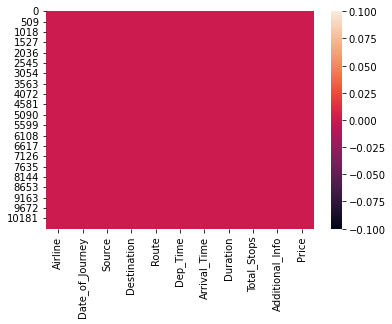

In [9]:
#Let's see it with the help of heatmap:
sns.heatmap(df.isnull())

In [10]:
df.nunique()

Airline              12
Date_of_Journey      44
Source                5
Destination           6
Route               128
Dep_Time            222
Arrival_Time       1343
Duration            368
Total_Stops           5
Additional_Info      10
Price              1870
dtype: int64

Let's work on additional info column:

In [11]:
df["Additional_Info"].value_counts()

No info                         8344
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
1 Short layover                    1
Red-eye flight                     1
2 Long layover                     1
Name: Additional_Info, dtype: int64

In Additional_Info columns we have 8345 time mentioned as no info hence, we can drop that column.

In [12]:
df.drop('Route', axis=1, inplace= True)
df.drop('Additional_Info', axis=1, inplace= True)
#dropped column Additional_Info and Total_Stops

Let's work on Total_Stops column first:

In [13]:
df['Total_Stops'].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [14]:
#changing 'non-stop' to 0 as its a direct flight
df['Total_Stops'] = df['Total_Stops'].replace(to_replace='non-stop', value='0',regex=True)
#changing stops and stop to ''
df['Total_Stops'] = df['Total_Stops'].replace(to_replace='stops', value='',regex=True)
df['Total_Stops'] = df['Total_Stops'].replace(to_replace='stop', value='',regex=True)

In [15]:
df['Total_Stops'].value_counts()

1     5625
0     3491
2     1520
3       45
4        1
Name: Total_Stops, dtype: int64

Let's work on Duration column now:

In [16]:
df['Duration'] = df['Duration'].replace(to_replace='h ', value='.',regex=True)
df['Duration'] = df['Duration'].str.replace('m', '')
#We have replaced 'h ' to . and m to nothing

In [17]:
df['Duration'] = df['Duration'].replace(to_replace='h', value='.',regex=True)
#now replaced h to .
df['Duration']=df['Duration'].str.strip()
#removing spaces from column as it was giving error while converting data to numberic

In [18]:
df['Duration']=pd.to_numeric(df['Duration'])

Let's work on which has time in it i.e. Dep_Time and Arrival_Time:

In [19]:
# Extract hours time from Dep_Time
df["Dep_hour"] = pd.to_datetime(df['Dep_Time']).dt.hour
df["Dep_min"] = pd.to_datetime(df['Dep_Time']).dt.minute

# Extract hours time from Arrival_Time
df["Arrival_hour"] = pd.to_datetime(df['Arrival_Time']).dt.hour
df["Arrival_min"] = pd.to_datetime(df['Arrival_Time']).dt.minute

#Now let's drop previous two columns
df.drop(['Dep_Time','Arrival_Time'], axis=1, inplace=True)

Let's work on Date_of_Journey column:

In [20]:
df['Journey_Date']=pd.to_datetime(df['Date_of_Journey'],format="%d/%m/%Y").dt.day
df['Journey_Month']=pd.to_datetime(df['Date_of_Journey'],format="%d/%m/%Y").dt.month

In [21]:
df.drop('Date_of_Journey',axis=1, inplace=True)

In [22]:
df

,Airline,Source,Destination,Duration,Total_Stops,Price,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Journey_Date,Journey_Month
0,IndiGo,Banglore,New Delhi,2.50,0,3897,22,20,1,10,24,3
1,Air India,Kolkata,Banglore,7.25,2,7662,5,50,13,15,1,5
2,Jet Airways,Delhi,Cochin,19.00,2,13882,9,25,4,25,9,6
3,IndiGo,Kolkata,Banglore,5.25,1,6218,18,5,23,30,12,5
4,IndiGo,Banglore,New Delhi,4.45,1,13302,16,50,21,35,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,2.30,0,4107,19,55,22,25,9,4
10679,Air India,Kolkata,Banglore,2.35,0,4145,20,45,23,20,27,4
10680,Jet Airways,Banglore,Delhi,3.00,0,7229,8,20,11,20,27,4
10681,Vistara,Banglore,New Delhi,2.40,0,12648,11,30,14,10,1,3


In [23]:
cat_col=[]
for i in df:
    if df.dtypes[i] == object:
        cat_col.append(i)
        
print(cat_col)

['Airline', 'Source', 'Destination', 'Total_Stops']


above columns are categorical data

# Let's do some Viasualization:

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64


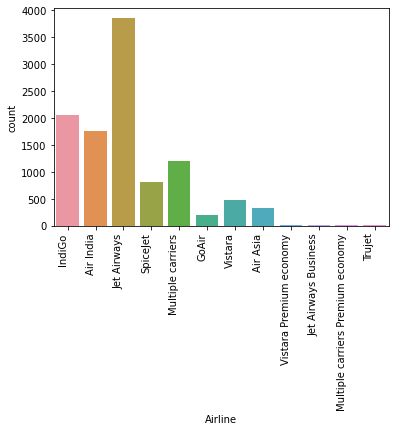

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64


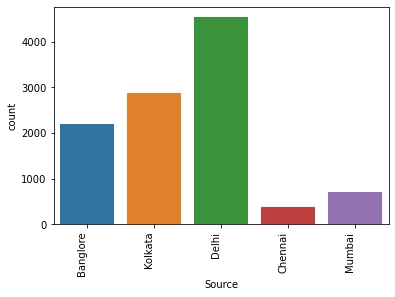

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64


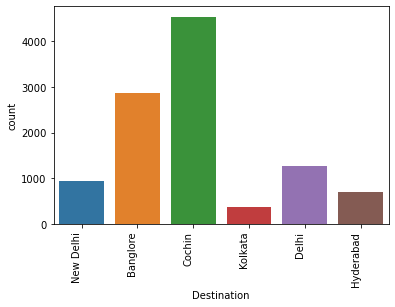

1     5625
0     3491
2     1520
3       45
4        1
Name: Total_Stops, dtype: int64


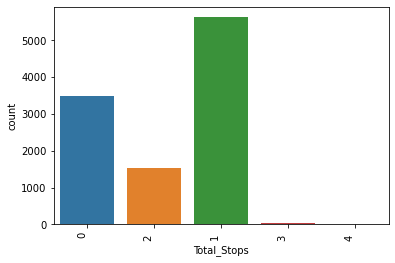

In [24]:
for i in cat_col:
    plt.figure()
    a=sns.countplot(df[i])
    print(df[i].value_counts())
    a.set_xticklabels(a.get_xticklabels(), rotation=90, ha="right")
    plt.show()

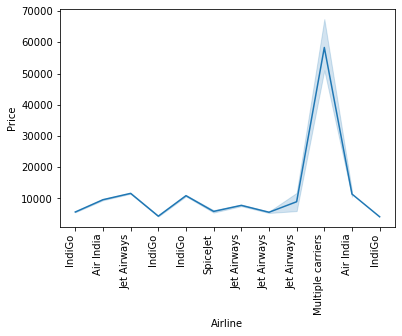

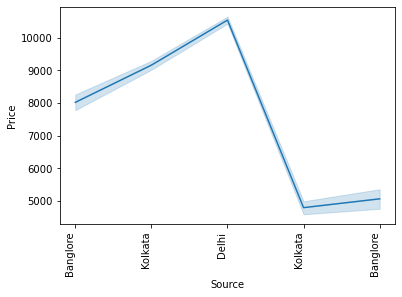

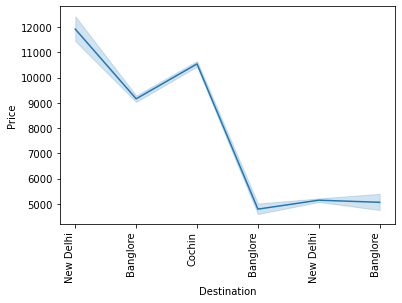

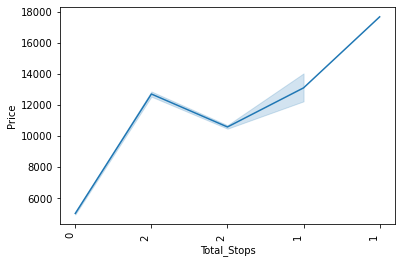

In [25]:
for i in cat_col:
    plt.figure()
    a=sns.lineplot(x=df[i],y=df['Price'],palette='Tableau')
    a.set_xticklabels(labels=df[i],rotation=90, ha="right")
    plt.show()

<Figure size 432x288 with 0 Axes>

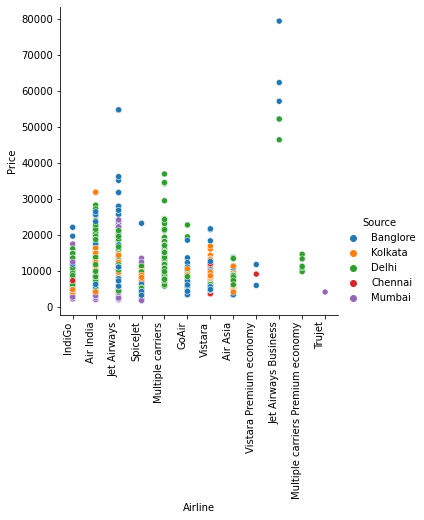

In [26]:
#a.set_xticklabels(labels=df['Airline'],rotation=90, ha="right")
plt.figure()
a=sns.relplot(x='Airline',y='Price',hue='Source',data=df,kind='scatter')
a.set_xticklabels(rotation=90, ha="right")
plt.show()

Highest price charged was from banglore source and with Jet airways Business airlines.

<Figure size 432x288 with 0 Axes>

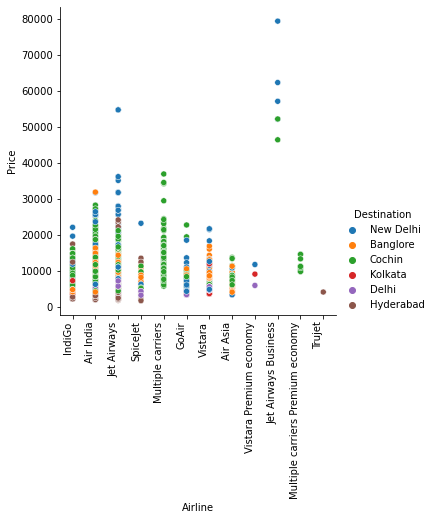

In [27]:
#a.set_xticklabels(labels=df['Airline'],rotation=90, ha="right")
plt.figure()
a=sns.relplot(x='Airline',y='Price',hue='Destination',data=df,kind='scatter')
a.set_xticklabels(rotation=90, ha="right")
plt.show()

Highest price charged was for destination new delhi and with Jet Airways Business airlines.

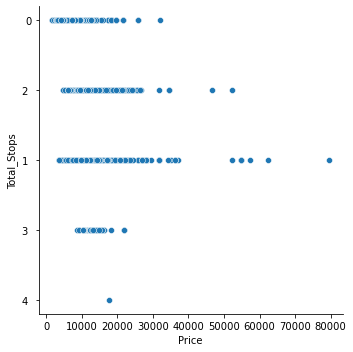

In [28]:
sns.relplot(x='Price', y='Total_Stops',data=df, kind='scatter')

For direct flight, price is ranging till around 33000. For one stop its ranging till 80000, for 2 stops its ranging till around 60000, for 3 stops its ranging till around 25000 and for 4 stops flight cost was around 20000

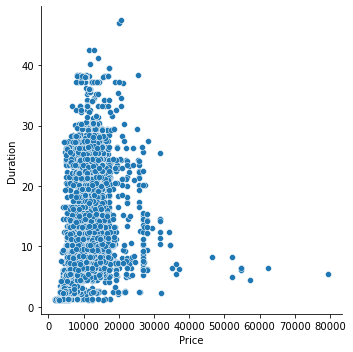

In [29]:
sns.relplot(x='Price', y='Duration',data=df, kind='scatter')

For duration from 0 to 40, usually price is ranging till 40000.

<Figure size 432x288 with 0 Axes>

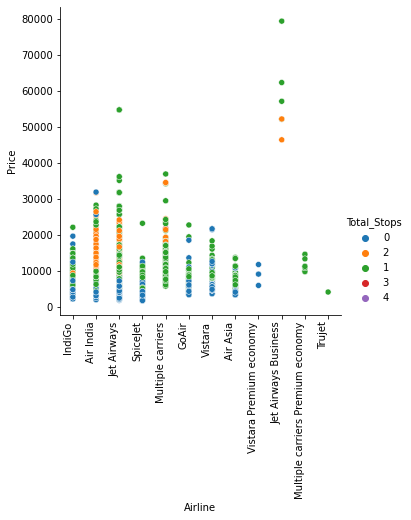

In [30]:
#a.set_xticklabels(labels=df['Airline'],rotation=90, ha="right")
plt.figure()
a=sns.relplot(x='Airline',y='Price',hue='Total_Stops',data=df,kind='scatter')
a.set_xticklabels(rotation=90, ha="right")
plt.show()

Highest price charged was for one stop flight and with jet Airways Business airlines.

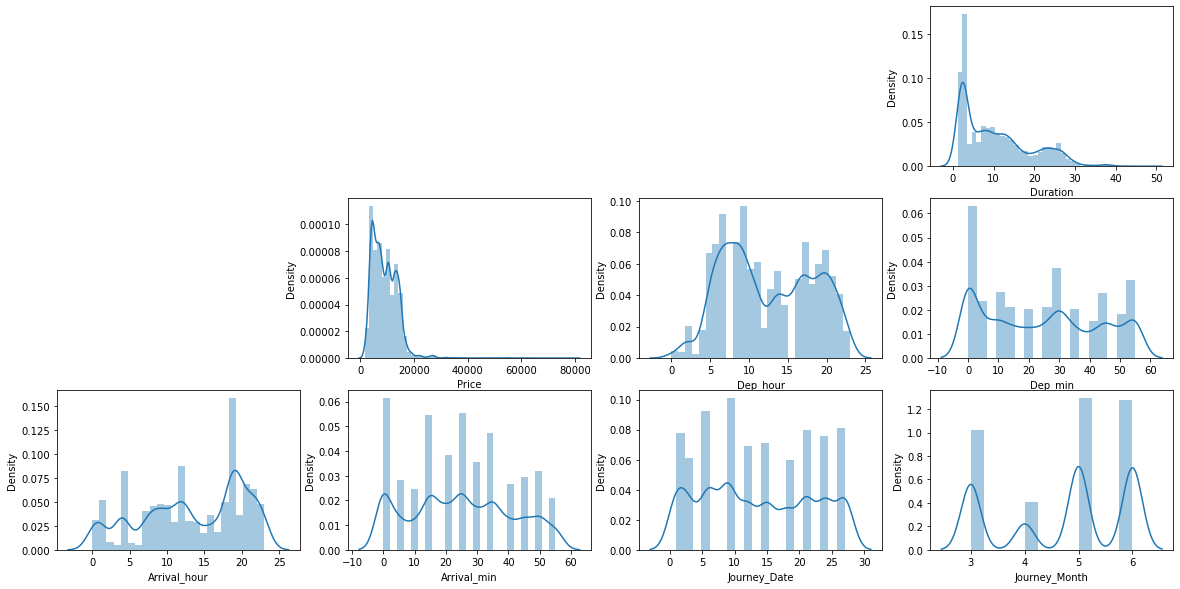

In [31]:
plt.figure(figsize=(20,10))
for i in range(len(df.columns)):
    if df.dtypes[i] != 'object':
        plt.subplot(3,4,i+1)
        sns.distplot(df[df.columns[i]])

We can see uneven distribution of data in all columns.

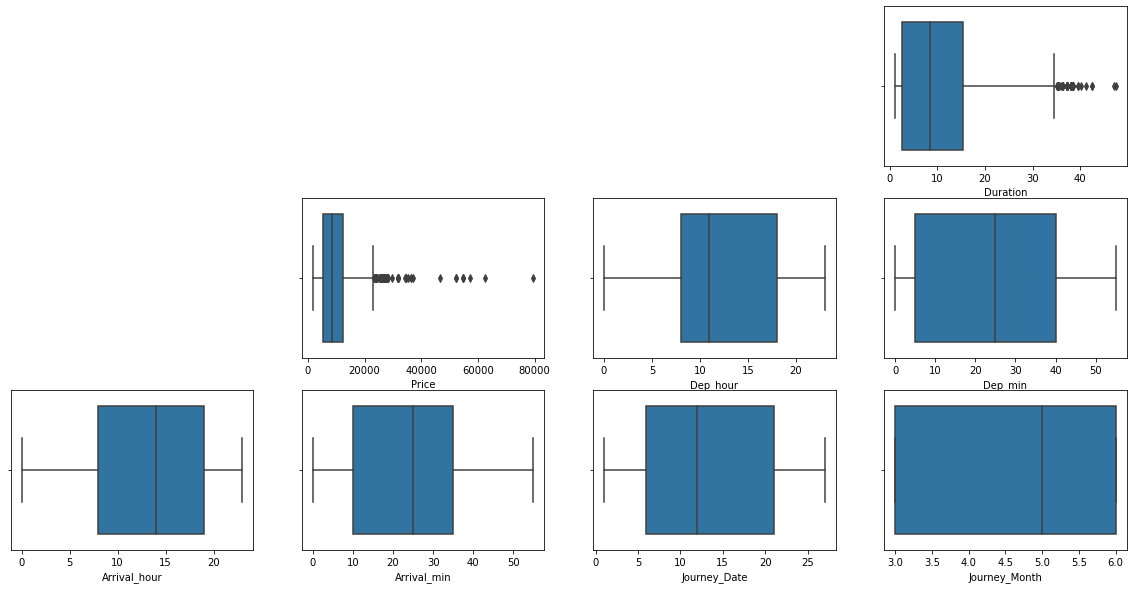

In [32]:
plt.figure(figsize=(20,10))
for i in range(len(df.columns)):
    if df.dtypes[i] != 'object':
        plt.subplot(3,4,i+1)
        sns.boxplot(df[df.columns[i]])

We can see outliers in Duration and price column.

In [33]:
df.skew()

Duration         0.855125
Total_Stops      0.317109
Price            1.812405
Dep_hour         0.112924
Dep_min          0.167234
Arrival_hour    -0.370146
Arrival_min      0.110945
Journey_Date     0.118174
Journey_Month   -0.387409
dtype: float64

All the values of skewness are in range of -0.5 to +0.5 except Duration and Price.

Duration is the Categorical data types no need to remove skewness.

Price is our target columns ,so no need to remove this column.

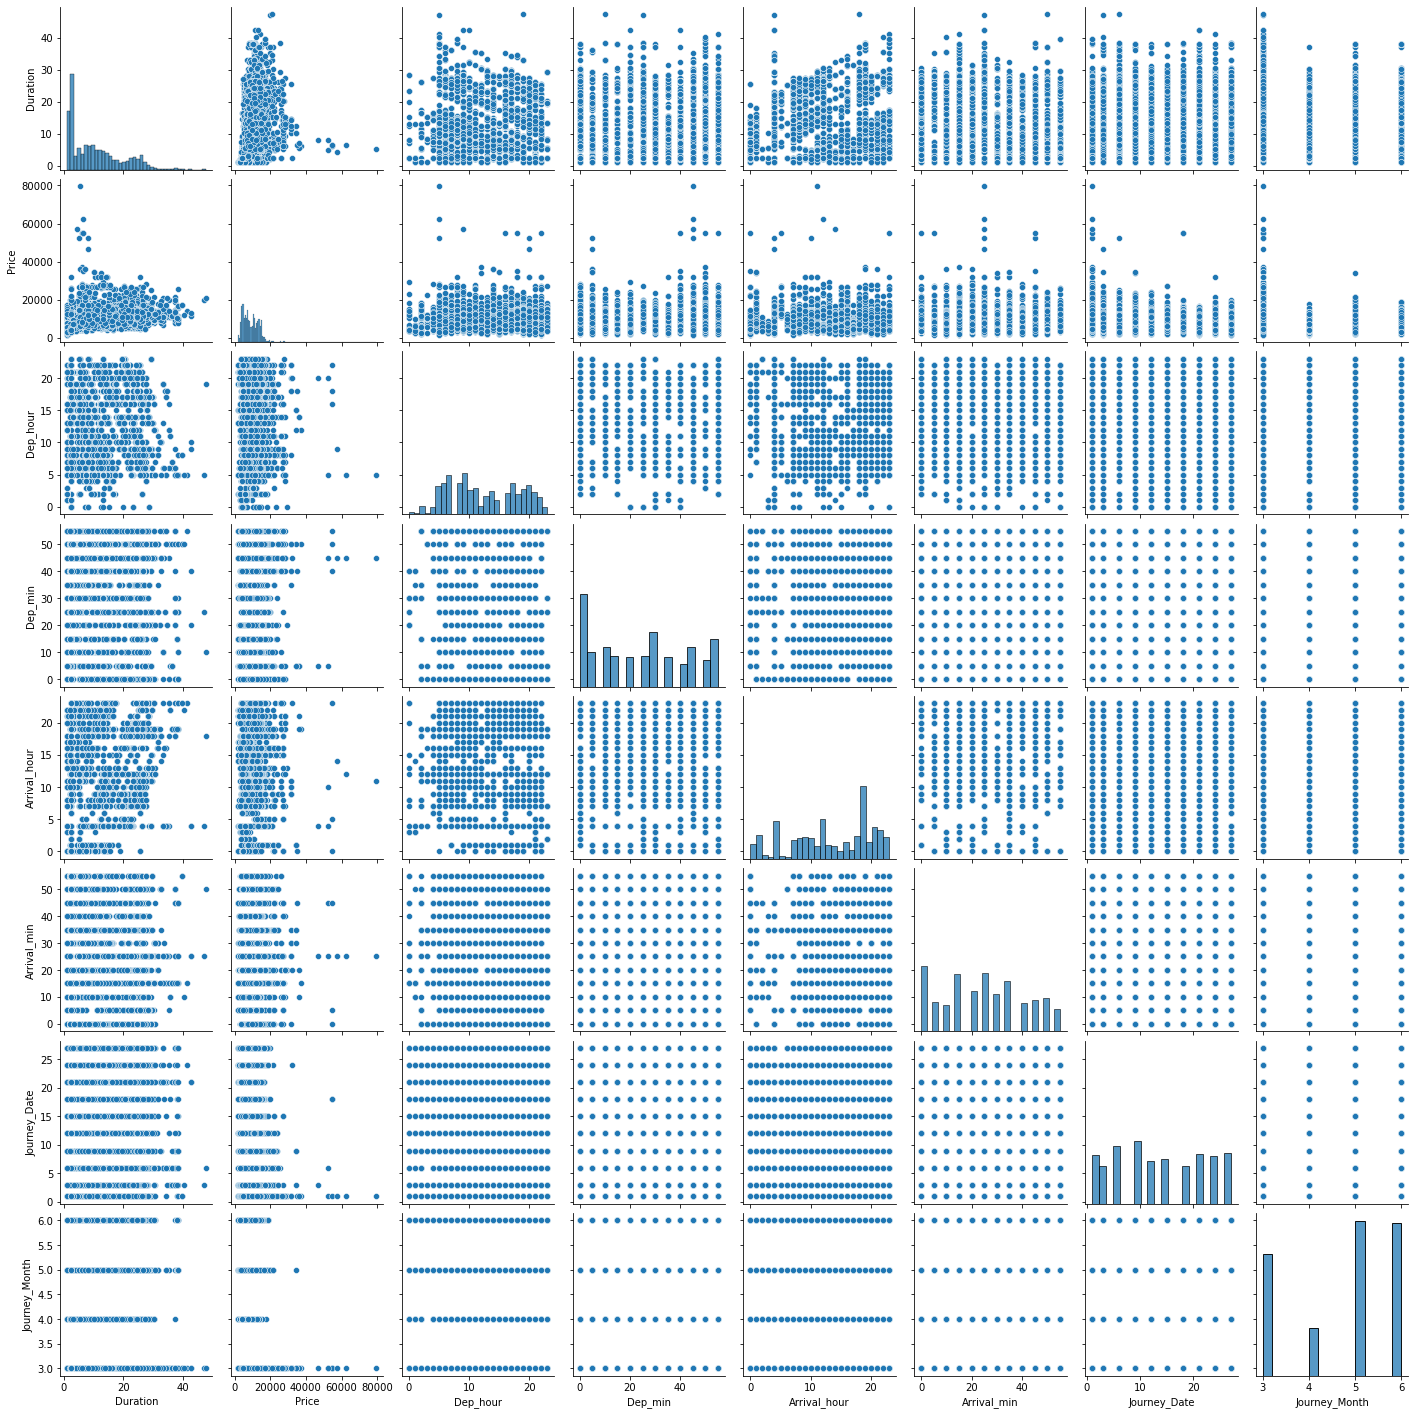

In [34]:
sns.pairplot(df)

here we can see that all dataset are act in your nature

# Encoding:

In [35]:
from sklearn.preprocessing import OrdinalEncoder
oe=OrdinalEncoder()

for i in df.columns:
    if df[i].dtypes=='object':
        df[i]=oe.fit_transform(df[i].values.astype(str).reshape(-1,1))

In [36]:
df

,Airline,Source,Destination,Duration,Total_Stops,Price,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Journey_Date,Journey_Month
0,3.0,0.0,5.0,2.50,0.0,3897,22,20,1,10,24,3
1,1.0,3.0,0.0,7.25,2.0,7662,5,50,13,15,1,5
2,4.0,2.0,1.0,19.00,2.0,13882,9,25,4,25,9,6
3,3.0,3.0,0.0,5.25,1.0,6218,18,5,23,30,12,5
4,3.0,0.0,5.0,4.45,1.0,13302,16,50,21,35,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0.0,3.0,0.0,2.30,0.0,4107,19,55,22,25,9,4
10679,1.0,3.0,0.0,2.35,0.0,4145,20,45,23,20,27,4
10680,4.0,0.0,2.0,3.00,0.0,7229,8,20,11,20,27,4
10681,10.0,0.0,5.0,2.40,0.0,12648,11,30,14,10,1,3


now all columns are numeric datatypes after performing OrdinalEncoding.

# describe the datasets:

In [37]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Airline,10682.0,3.966205,2.352090,0.00,3.0,4.0,4.0,11.0
Source,10682.0,1.952256,1.177276,0.00,2.0,2.0,3.0,4.0
Destination,10682.0,1.436154,1.474845,0.00,0.0,1.0,2.0,5.0
Duration,10682.0,10.554873,8.483141,1.15,2.5,8.4,15.3,47.4
Total_Stops,10682.0,0.824190,0.675229,0.00,0.0,1.0,1.0,4.0
Price,10682.0,9087.214567,4611.548810,1759.00,5277.0,8372.0,12373.0,79512.0
Dep_hour,10682.0,12.491013,5.748820,0.00,8.0,11.0,18.0,23.0
Dep_min,10682.0,24.409287,18.767801,0.00,5.0,25.0,40.0,55.0
Arrival_hour,10682.0,13.349186,6.859317,0.00,8.0,14.0,19.0,23.0
Arrival_min,10682.0,24.690601,16.506808,0.00,10.0,25.0,35.0,55.0


there is a large difference between 75% and maximum for some columns.so outliers are present in this dataset.lets see its with visualization.

<AxesSubplot:>

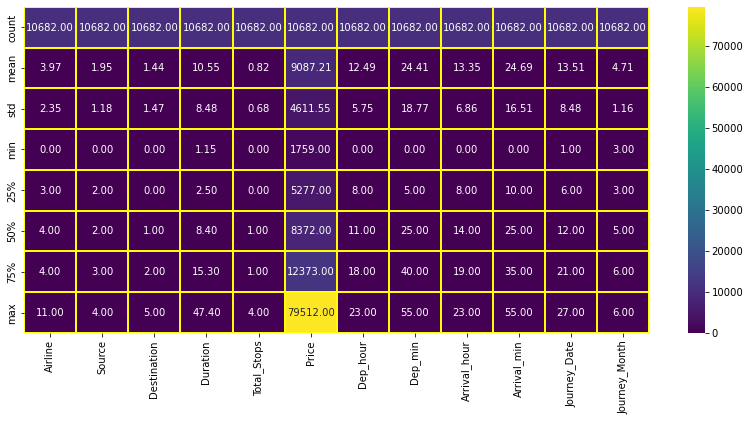

In [38]:
plt.figure(figsize=(14,6))
sns.heatmap(df.describe(),annot=True,linewidths=0.1,linecolor="yellow",fmt="0.2f",cmap="viridis")

# Correlation of the columns with target columns:

In [39]:
df.corr()

,Airline,Source,Destination,Duration,Total_Stops,Price,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Journey_Date,Journey_Month
Airline,1.000000,-0.013397,0.018446,-0.159476,-0.199396,-0.039565,-0.035269,-0.059922,-0.007567,-0.071092,0.026137,0.024674
Source,-0.013397,1.000000,-0.592576,0.163553,0.192840,0.015999,0.059047,-0.056998,0.025635,0.021040,0.004902,0.183268
Destination,0.018446,-0.592576,1.000000,-0.257981,-0.295476,-0.071122,-0.072997,0.127931,-0.039729,0.017196,-0.041025,-0.364682
Duration,-0.159476,0.163553,-0.257981,1.000000,0.739304,0.508113,0.003036,-0.019476,0.053487,-0.072049,-0.022477,0.014996
Total_Stops,-0.199396,0.192840,-0.295476,0.739304,1.000000,0.603897,-0.061476,-0.002618,0.038140,-0.106940,-0.009451,0.054383
Price,-0.039565,0.015999,-0.071122,0.508113,0.603897,1.000000,0.006799,-0.024458,0.024244,-0.086155,-0.153774,-0.103643
Dep_hour,-0.035269,0.059047,-0.072997,0.003036,-0.061476,0.006799,1.000000,-0.024745,0.005180,0.067911,0.002170,0.039127
Dep_min,-0.059922,-0.056998,0.127931,-0.019476,-0.002618,-0.024458,-0.024745,1.000000,0.043122,-0.017597,-0.008170,-0.059267
Arrival_hour,-0.007567,0.025635,-0.039729,0.053487,0.038140,0.024244,0.005180,0.043122,1.000000,-0.154363,-0.003245,-0.003927
Arrival_min,-0.071092,0.021040,0.017196,-0.072049,-0.106940,-0.086155,0.067911,-0.017597,-0.154363,1.000000,-0.017510,-0.100626


Lets see its with visualization:

<AxesSubplot:>

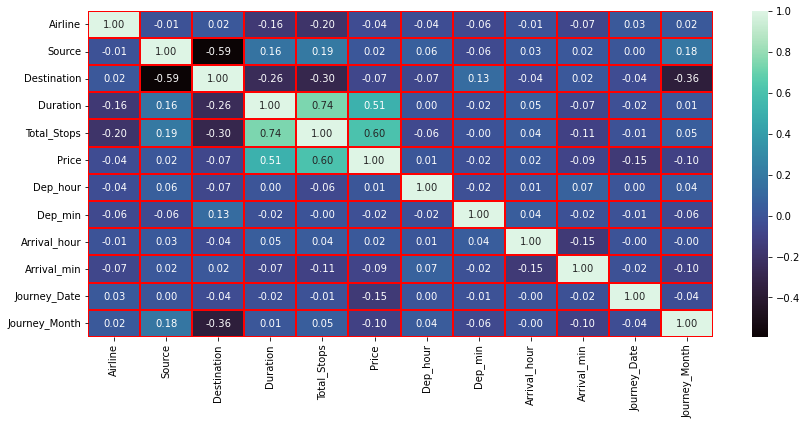

In [40]:
plt.figure(figsize=(14,6))
sns.heatmap(df.corr(),annot=True,linewidths=0.1,linecolor="red",fmt="0.2f",cmap="mako")

Checking the columns which are positively and negative correlated with the target columns:

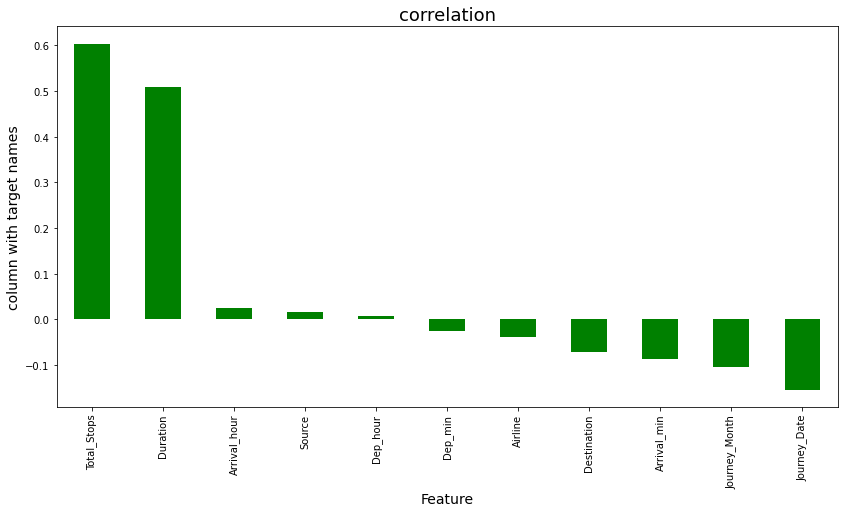

In [41]:
plt.figure(figsize=(14,7))
df.corr()['Price'].sort_values(ascending=False).drop(['Price']).plot(kind='bar',color='g')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('column with target names',fontsize=14)
plt.title('correlation',fontsize=18)
plt.show()

above figure we can see that Total_Stops And Duration are the high correlation with the target columns. Dep_hour is the less correlation with the target column.

# outliers removal:

In [42]:
from scipy.stats import zscore
z=np.abs(zscore(df))
threshold=3
np.where(z>3)

(array([  123,   226,   396,   402,   486,   510,   553,   597,   628,
          657,   785,   826,   919,   936,   946,   959,   966,   969,
          975,  1067,  1113,  1196,  1218,  1246,  1341,  1346,  1424,
         1442,  1466,  1478,  1496,  1551,  1629,  1654,  1657,  1665,
         1785,  1791,  1804,  1918,  2055,  2099,  2108,  2172,  2172,
         2495,  2553,  2556,  2618,  2623,  2633,  2635,  2641,  2654,
         2693,  2718,  2718,  2814,  2822,  2924,  3032,  3111,  3157,
         3220,  3257,  3317,  3400,  3457,  3496,  3535,  3568,  3584,
         3700,  3790,  3815,  3815,  3945,  3966,  4012,  4047,  4118,
         4118,  4463,  4463,  4521,  4655,  4655,  4676,  4760,  4829,
         5013,  5050,  5136,  5372,  5439,  5446,  5516,  5662,  5701,
         5701,  5710,  5711,  5719,  5738,  5745,  5782,  5838,  5856,
         5933,  5947,  5953,  5986,  5996,  6059,  6085,  6314,  6321,
         6407,  6444,  6476,  6576,  6588,  6599,  6605,  6884,  6884,
      

In [43]:
df_new=df[(z<3).all(axis=1)]
df_new

,Airline,Source,Destination,Duration,Total_Stops,Price,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Journey_Date,Journey_Month
0,3.0,0.0,5.0,2.50,0.0,3897,22,20,1,10,24,3
1,1.0,3.0,0.0,7.25,2.0,7662,5,50,13,15,1,5
2,4.0,2.0,1.0,19.00,2.0,13882,9,25,4,25,9,6
3,3.0,3.0,0.0,5.25,1.0,6218,18,5,23,30,12,5
4,3.0,0.0,5.0,4.45,1.0,13302,16,50,21,35,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0.0,3.0,0.0,2.30,0.0,4107,19,55,22,25,9,4
10679,1.0,3.0,0.0,2.35,0.0,4145,20,45,23,20,27,4
10680,4.0,0.0,2.0,3.00,0.0,7229,8,20,11,20,27,4
10681,10.0,0.0,5.0,2.40,0.0,12648,11,30,14,10,1,3


now remove all outliers

In [44]:
df_new.shape

(10488, 12)

In [45]:
df.shape

(10682, 12)

In [46]:
data_loss=((10682-10488)/10682)*100
data_loss

1.8161392997566002

after removing otliers 1.81 percentage data loss

In [47]:
x=df_new.drop("Price",axis=1)
y=df_new["Price"]
print(x.shape)
print(y.shape)

(10488, 11)
(10488,)


separating features columns which is denoting x and target columns(y)

# Let's perform standardization:

In [48]:
from sklearn.preprocessing import MinMaxScaler
m=MinMaxScaler()
m.fit_transform(x)

array([[0.27272727, 0.        , 1.        , ..., 0.18181818, 0.88461538,
        0.        ],
       [0.09090909, 0.75      , 0.        , ..., 0.27272727, 0.        ,
        0.66666667],
       [0.36363636, 0.5       , 0.2       , ..., 0.45454545, 0.30769231,
        1.        ],
       ...,
       [0.36363636, 0.        , 0.4       , ..., 0.36363636, 1.        ,
        0.33333333],
       [0.90909091, 0.        , 1.        , ..., 0.18181818, 0.        ,
        0.        ],
       [0.09090909, 0.5       , 0.2       , ..., 0.27272727, 0.30769231,
        0.66666667]])

In [49]:
from sklearn.linear_model import LinearRegression,ElasticNet
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.ensemble import AdaBoostRegressor, BaggingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor


from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [50]:
maxAcc=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=i)
    Ln=LinearRegression()
    Ln.fit(x_train,y_train)
    pred=Ln.predict(x_test)
    acc=r2_score(y_test,pred)
    if acc>maxAcc:
        maxAcc=acc
        maxRS=i
print("Best accuracy is ",maxAcc, " at Random State ",maxRS)

Best accuracy is  0.533272744896206  at Random State  132


In [51]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=maxRS)

In [52]:
model=[LinearRegression(),AdaBoostRegressor(),ElasticNet(alpha=0.0001),
       KNeighborsRegressor(),DecisionTreeRegressor(), BaggingRegressor()]
for m in model:
    m.fit(x_train,y_train)
    #sc=m.score(x_train,y_train)
    predm=m.predict(x_test)
    acc=r2_score(y_test,predm)
    print('Accuracy Score of',m,'is:',acc)
    print('mean_absolute_error:',mean_absolute_error(y_test,predm))
    print('mean_squared_error:',mean_squared_error(y_test,predm))
    print('Root mean_squared_error:',np.sqrt(mean_squared_error(y_test,predm)))
    print("\n")

Accuracy Score of LinearRegression() is: 0.533272744896206
mean_absolute_error: 2172.9881616792304
mean_squared_error: 7639783.822244651
Root mean_squared_error: 2764.0158867569216


Accuracy Score of AdaBoostRegressor() is: 0.6154984953769886
mean_absolute_error: 2111.9485994841575
mean_squared_error: 6293843.658207503
Root mean_squared_error: 2508.75340721393


Accuracy Score of ElasticNet(alpha=0.0001) is: 0.5332664502356794
mean_absolute_error: 2173.005136519085
mean_squared_error: 7639886.858536472
Root mean_squared_error: 2764.0345255688235


Accuracy Score of KNeighborsRegressor() is: 0.7047131091445964
mean_absolute_error: 1572.755100095329
mean_squared_error: 4833503.90835081
Root mean_squared_error: 2198.5231198126644


Accuracy Score of DecisionTreeRegressor() is: 0.7171386905649519
mean_absolute_error: 1266.8603670162058
mean_squared_error: 4630111.552581692
Root mean_squared_error: 2151.7694004194996


Accuracy Score of BaggingRegressor() is: 0.813036486224852
mean_absolut

Lets check for cross validation for better acurrecy

# Cross Validation Model:

In [53]:
model=[LinearRegression(),AdaBoostRegressor(),ElasticNet(alpha=0.0001),
       KNeighborsRegressor(),DecisionTreeRegressor(), BaggingRegressor()]
for m in model:
    score=cross_val_score(m,x,y,cv=5)
    print("Score for",m,"is: ",score.mean())

Score for LinearRegression() is:  0.5030835758014963
Score for AdaBoostRegressor() is:  0.5972161657315382
Score for ElasticNet(alpha=0.0001) is:  0.5030835565849394
Score for KNeighborsRegressor() is:  0.6728092056087356
Score for DecisionTreeRegressor() is:  0.708488998444495
Score for BaggingRegressor() is:  0.7995358206928096


With BaggingRegressor model there is very less difference in accuracy and cross validation score, Hence the best model is BaggingRegressor.

# Hyper Parameter Training:

In [54]:
from sklearn.model_selection import GridSearchCV

In [55]:
parameters={'base_estimator':[None],'n_estimators':[0,2,5,10],
      'bootstrap':[True,False],'oob_score':[True,False],'warm_start':[True,False],
       'bootstrap_features':[True,False],'random_state':range(0,20)}

In [56]:
GCV=GridSearchCV(BaggingRegressor(),parameters,cv=5)

In [57]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=BaggingRegressor(),
             param_grid={'base_estimator': [None], 'bootstrap': [True, False],
                         'bootstrap_features': [True, False],
                         'n_estimators': [0, 2, 5, 10],
                         'oob_score': [True, False],
                         'random_state': range(0, 20),
                         'warm_start': [True, False]})

In [58]:
GCV.best_params_

{'base_estimator': None,
 'bootstrap': True,
 'bootstrap_features': False,
 'n_estimators': 10,
 'oob_score': True,
 'random_state': 3,
 'warm_start': False}

In [59]:
Final_mod= BaggingRegressor(bootstrap="True",bootstrap_features="False",n_estimators=10,oob_score="True",random_state=3)
Final_mod.fit(x_train,y_train)
pred=Final_mod.predict(x_test)
r2=r2_score(y_test,pred)
print(r2*100)

78.23399269694895


After performing GridSearchCV method accuarcy is 78.23%

# saving the best model:

In [60]:
import pickle
filename= 'Flight_Price_Prediction.pkl'
pickle.dump(Final_mod, open(filename, 'wb'))

# Conclusion:

In [61]:
#load the model from the disk

loaded_model = pickle.load(open('Flight_Price_Prediction.pkl', 'rb'))
result = loaded_model.score(x_test,y_test)
print(result)

0.7823399269694895


In [62]:
conclusion=pd.DataFrame([loaded_model.predict(x_test)[:],pred[:]],index=["Predicted","Orginal"])
conclusion

,0,1,2,3,4,5,6,7,8,9,...,2088,2089,2090,2091,2092,2093,2094,2095,2096,2097
Predicted,12784.912,6861.69,11136.219866,10420.411796,11850.0875,4840.204848,13878.26,9820.04,9663.811042,10850.594545,...,12339.190347,4398.60619,5096.688112,12892.982359,12691.176877,6936.590992,12112.411038,10416.360579,9127.9,11765.496111
Orginal,12784.912,6861.69,11136.219866,10420.411796,11850.0875,4840.204848,13878.26,9820.04,9663.811042,10850.594545,...,12339.190347,4398.60619,5096.688112,12892.982359,12691.176877,6936.590992,12112.411038,10416.360579,9127.9,11765.496111


# Using Test Dataset:

In [63]:
#import libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [64]:
df1= pd.read_csv("flight price Test_set.csv")
df1

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL ? BOM ? COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU ? MAA ? BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL ? BOM ? COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL ? BOM ? COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR ? DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info
...,...,...,...,...,...,...,...,...,...,...
2666,Air India,6/06/2019,Kolkata,Banglore,CCU ? DEL ? BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info
2667,IndiGo,27/03/2019,Kolkata,Banglore,CCU ? BLR,14:20,16:55,2h 35m,non-stop,No info
2668,Jet Airways,6/03/2019,Delhi,Cochin,DEL ? BOM ? COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info
2669,Air India,6/03/2019,Delhi,Cochin,DEL ? BOM ? COK,04:00,19:15,15h 15m,1 stop,No info


In [65]:
df1.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info'],
      dtype='object')

Above is the list of all columns.

In [66]:
df1.shape

(2671, 10)

Dataset has 2671 rows and 10 columns.

In [67]:
df1.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
dtype: object

All columns are object type.

In [68]:
df1.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64

our data sets has no null values present here , lets see its with heatmap.

<AxesSubplot:>

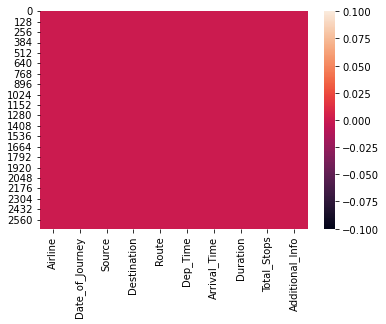

In [69]:
sns.heatmap(df1.isnull())

In [70]:
df1.nunique()

Airline             11
Date_of_Journey     44
Source               5
Destination          6
Route              100
Dep_Time           199
Arrival_Time       704
Duration           320
Total_Stops          5
Additional_Info      6
dtype: int64

Also route column give us the info that flight had follow which path which gives us number of halts or stop and we have already have this info in 'Total_Stops' hence we can drop this column as well. In Additional_Info columns we have 2148 time mentioned as no info hence, we can drop that column.

In [71]:
df1.drop('Route', axis=1, inplace= True)
df1.drop('Additional_Info', axis=1, inplace= True)
#dropped column Additional_Info and Total_Stops

Let's work on Total_Stops column first:

In [72]:
df1['Total_Stops'].value_counts()

1 stop      1431
non-stop     849
2 stops      379
3 stops       11
4 stops        1
Name: Total_Stops, dtype: int64

In [73]:
#changing 'non-stop' to 0 as its a direct flight
df1['Total_Stops'] = df1['Total_Stops'].replace(to_replace='non-stop', value='0',regex=True)
#changing stops and stop to ''
df1['Total_Stops'] = df1['Total_Stops'].replace(to_replace='stops', value='',regex=True)
df1['Total_Stops'] = df1['Total_Stops'].replace(to_replace='stop', value='',regex=True)

In [74]:
df1['Total_Stops'].value_counts()

1     1431
0      849
2      379
3       11
4        1
Name: Total_Stops, dtype: int64

Let's work on Duration column now:

In [75]:
df1['Duration'] = df1['Duration'].replace(to_replace='h ', value='.',regex=True)
df1['Duration'] = df1['Duration'].str.replace('m', '')
#We have replaced 'h ' to . and m to nothing

In [76]:
df1['Duration'] = df1['Duration'].replace(to_replace='h', value='.',regex=True)
#now replaced h to .
df1['Duration']=df1['Duration'].str.strip()
#removing spaces from column as it was giving error while converting data to numberic

In [77]:
df1['Duration']=pd.to_numeric(df1['Duration'])

Let's work on which has time in it i.e. Dep_Time and Arrival_Time:

In [78]:
# Extract hours time from Dep_Time
df1["Dep_hour"] = pd.to_datetime(df1['Dep_Time']).dt.hour
df1["Dep_min"] = pd.to_datetime(df1['Dep_Time']).dt.minute

# Extract hours time from Arrival_Time
df1["Arrival_hour"] = pd.to_datetime(df1['Arrival_Time']).dt.hour
df1["Arrival_min"] = pd.to_datetime(df1['Arrival_Time']).dt.minute

#Now let's drop previous two columns
df1.drop(['Dep_Time','Arrival_Time'], axis=1, inplace=True)

Let's work on Date_of_Journey column:

In [79]:
df1['Journey_Date']=pd.to_datetime(df1['Date_of_Journey'],format="%d/%m/%Y").dt.day
df1['Journey_month']=pd.to_datetime(df1['Date_of_Journey'],format="%d/%m/%Y").dt.month

In [80]:
df1.drop('Date_of_Journey',axis=1, inplace=True)

In [81]:
cat_col=[]
for i in df1:
    if df1.dtypes[i] == object:
        cat_col.append(i)
        
print(cat_col)

['Airline', 'Source', 'Destination', 'Total_Stops']


These are the columns which are categorical data types.

Jet Airways                          897
IndiGo                               511
Air India                            440
Multiple carriers                    347
SpiceJet                             208
Vistara                              129
Air Asia                              86
GoAir                                 46
Multiple carriers Premium economy      3
Vistara Premium economy                2
Jet Airways Business                   2
Name: Airline, dtype: int64


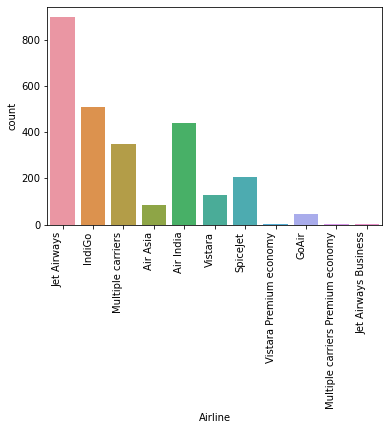

Delhi       1145
Kolkata      710
Banglore     555
Mumbai       186
Chennai       75
Name: Source, dtype: int64


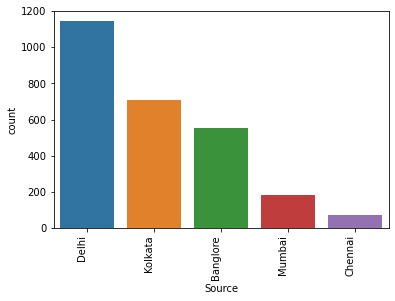

Cochin       1145
Banglore      710
Delhi         317
New Delhi     238
Hyderabad     186
Kolkata        75
Name: Destination, dtype: int64


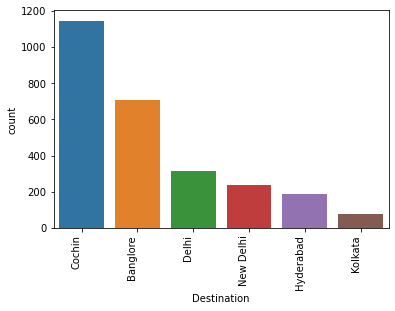

1     1431
0      849
2      379
3       11
4        1
Name: Total_Stops, dtype: int64


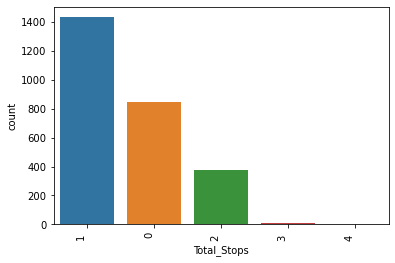

In [82]:
for i in cat_col:
    plt.figure()
    a=sns.countplot(df1[i])
    print(df1[i].value_counts())
    a.set_xticklabels(a.get_xticklabels(), rotation=90, ha="right")
    plt.show()

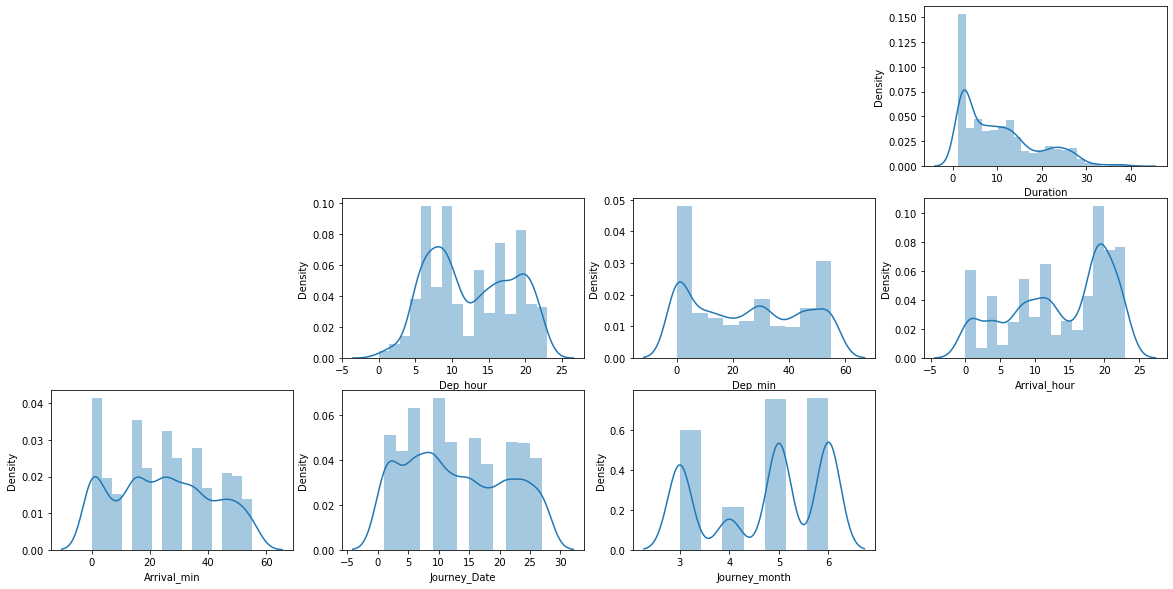

In [83]:
plt.figure(figsize=(20,10))
for i in range(len(df1.columns)):
    if df1.dtypes[i] != 'object':
        plt.subplot(3,4,i+1)
        sns.distplot(df1[df1.columns[i]])

We can see uneven distribution in all columns.

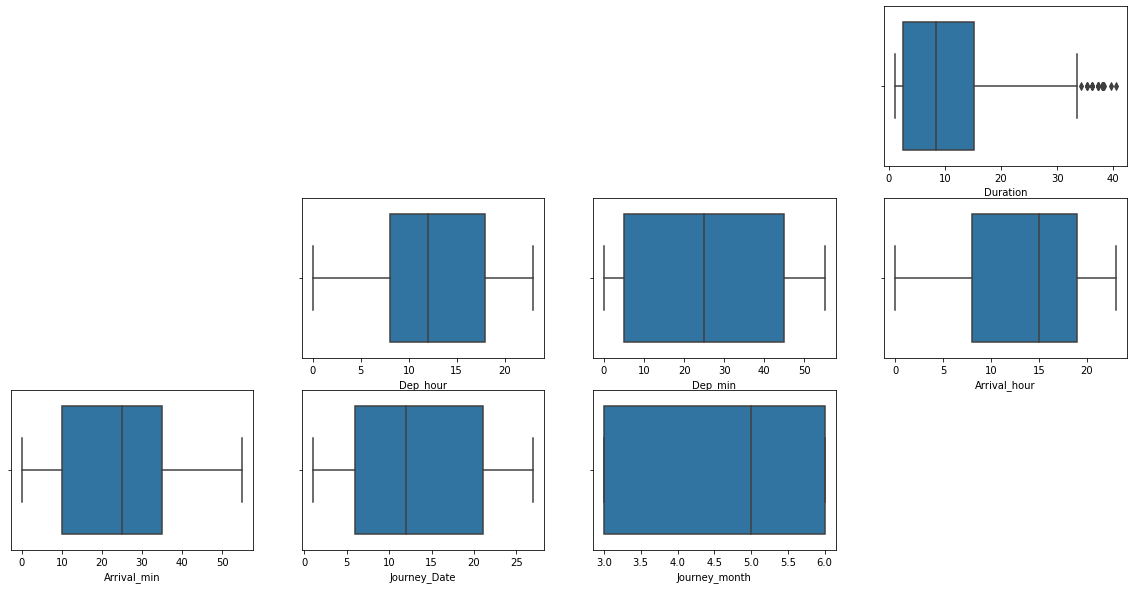

In [84]:
plt.figure(figsize=(20,10))
for i in range(len(df1.columns)):
    if df1.dtypes[i] != 'object':
        plt.subplot(3,4,i+1)
        sns.boxplot(df1[df1.columns[i]])

We have outliers in Duration column.

# Encoding:

In [85]:
from sklearn.preprocessing import OrdinalEncoder
oe=OrdinalEncoder()

for i in df1.columns:
    if df1[i].dtypes=='object':
        df1[i]=oe.fit_transform(df1[i].values.astype(str).reshape(-1,1))

In [86]:
df1

,Airline,Source,Destination,Duration,Total_Stops,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Journey_Date,Journey_month
0,4.0,2.0,1.0,10.55,1.0,17,30,4,25,6,6
1,3.0,3.0,0.0,4.00,1.0,6,20,10,20,12,5
2,4.0,2.0,1.0,23.45,1.0,19,15,19,0,21,5
3,6.0,2.0,1.0,13.00,1.0,8,0,21,0,21,5
4,0.0,0.0,2.0,2.50,0.0,23,55,2,45,24,6
...,...,...,...,...,...,...,...,...,...,...,...
2666,1.0,3.0,0.0,23.55,1.0,20,30,20,25,6,6
2667,3.0,3.0,0.0,2.35,0.0,14,20,16,55,27,3
2668,4.0,2.0,1.0,6.35,1.0,21,50,4,25,6,3
2669,1.0,2.0,1.0,15.15,1.0,4,0,19,15,6,3


after performing OrdinalEncoding , all columns are numeric datatype.

# Describe Datasets:

In [87]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
Airline,2671.0,3.972669,2.295657,0.00,3.00,4.0,6.0,10.0
Source,2671.0,1.961438,1.184328,0.00,2.00,2.0,3.0,4.0
Destination,2671.0,1.432797,1.467971,0.00,0.00,1.0,2.0,5.0
Duration,2671.0,10.499158,8.382846,1.15,2.55,8.4,15.2,40.4
Total_Stops,2671.0,0.833396,0.672315,0.00,0.00,1.0,1.0,4.0
Dep_hour,2671.0,12.603519,5.686673,0.00,8.00,12.0,18.0,23.0
Dep_min,2671.0,24.891426,19.086522,0.00,5.00,25.0,45.0,55.0
Arrival_hour,2671.0,13.585174,7.040396,0.00,8.00,15.0,19.0,23.0
Arrival_min,2671.0,24.558218,16.775436,0.00,10.00,25.0,35.0,55.0
Journey_Date,2671.0,12.915762,8.260824,1.00,6.00,12.0,21.0,27.0


Lets see its with visualization

<AxesSubplot:>

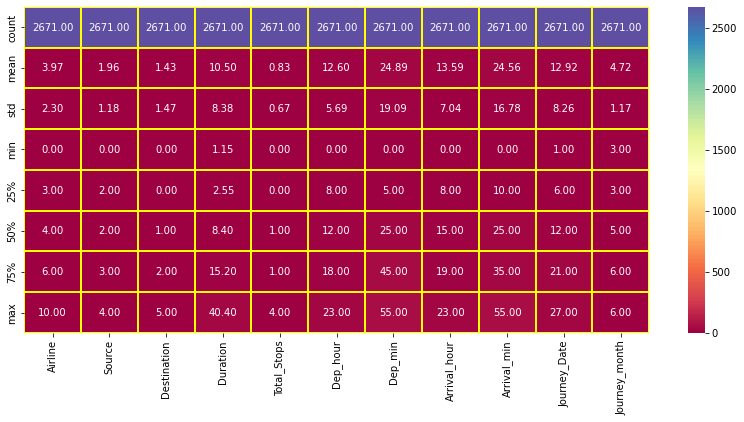

In [88]:
plt.figure(figsize=(14,6))
sns.heatmap(df1.describe(),annot=True,linewidths=0.1,linecolor="yellow",fmt="0.2f",cmap="Spectral")

# Lets Check Correlation:

<AxesSubplot:>

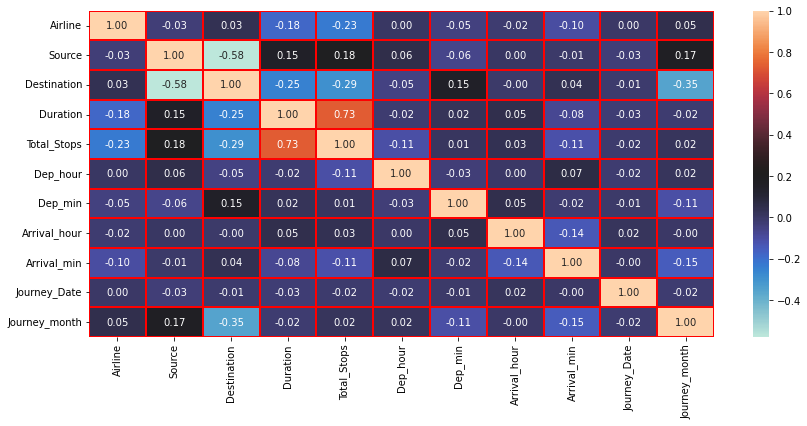

In [89]:
plt.figure(figsize=(14,6))
sns.heatmap(df1.corr(),annot=True,linewidths=0.1,linecolor="red",fmt="0.2f",cmap="icefire")

There are no target columns .

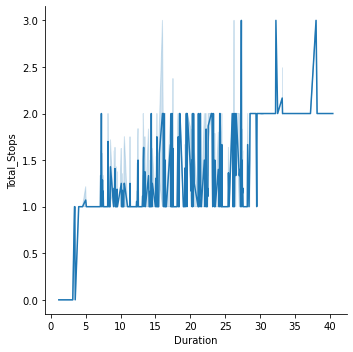

In [90]:
sns.relplot(x='Duration', y='Total_Stops',data=df1, kind='line')

For duration of maximum 5 hours we have direct flights, for duration of maximum 30 hours we have 2 stops flights and for duration of 30 to 40 hours of flight we have 3 & 4 hours of flights.

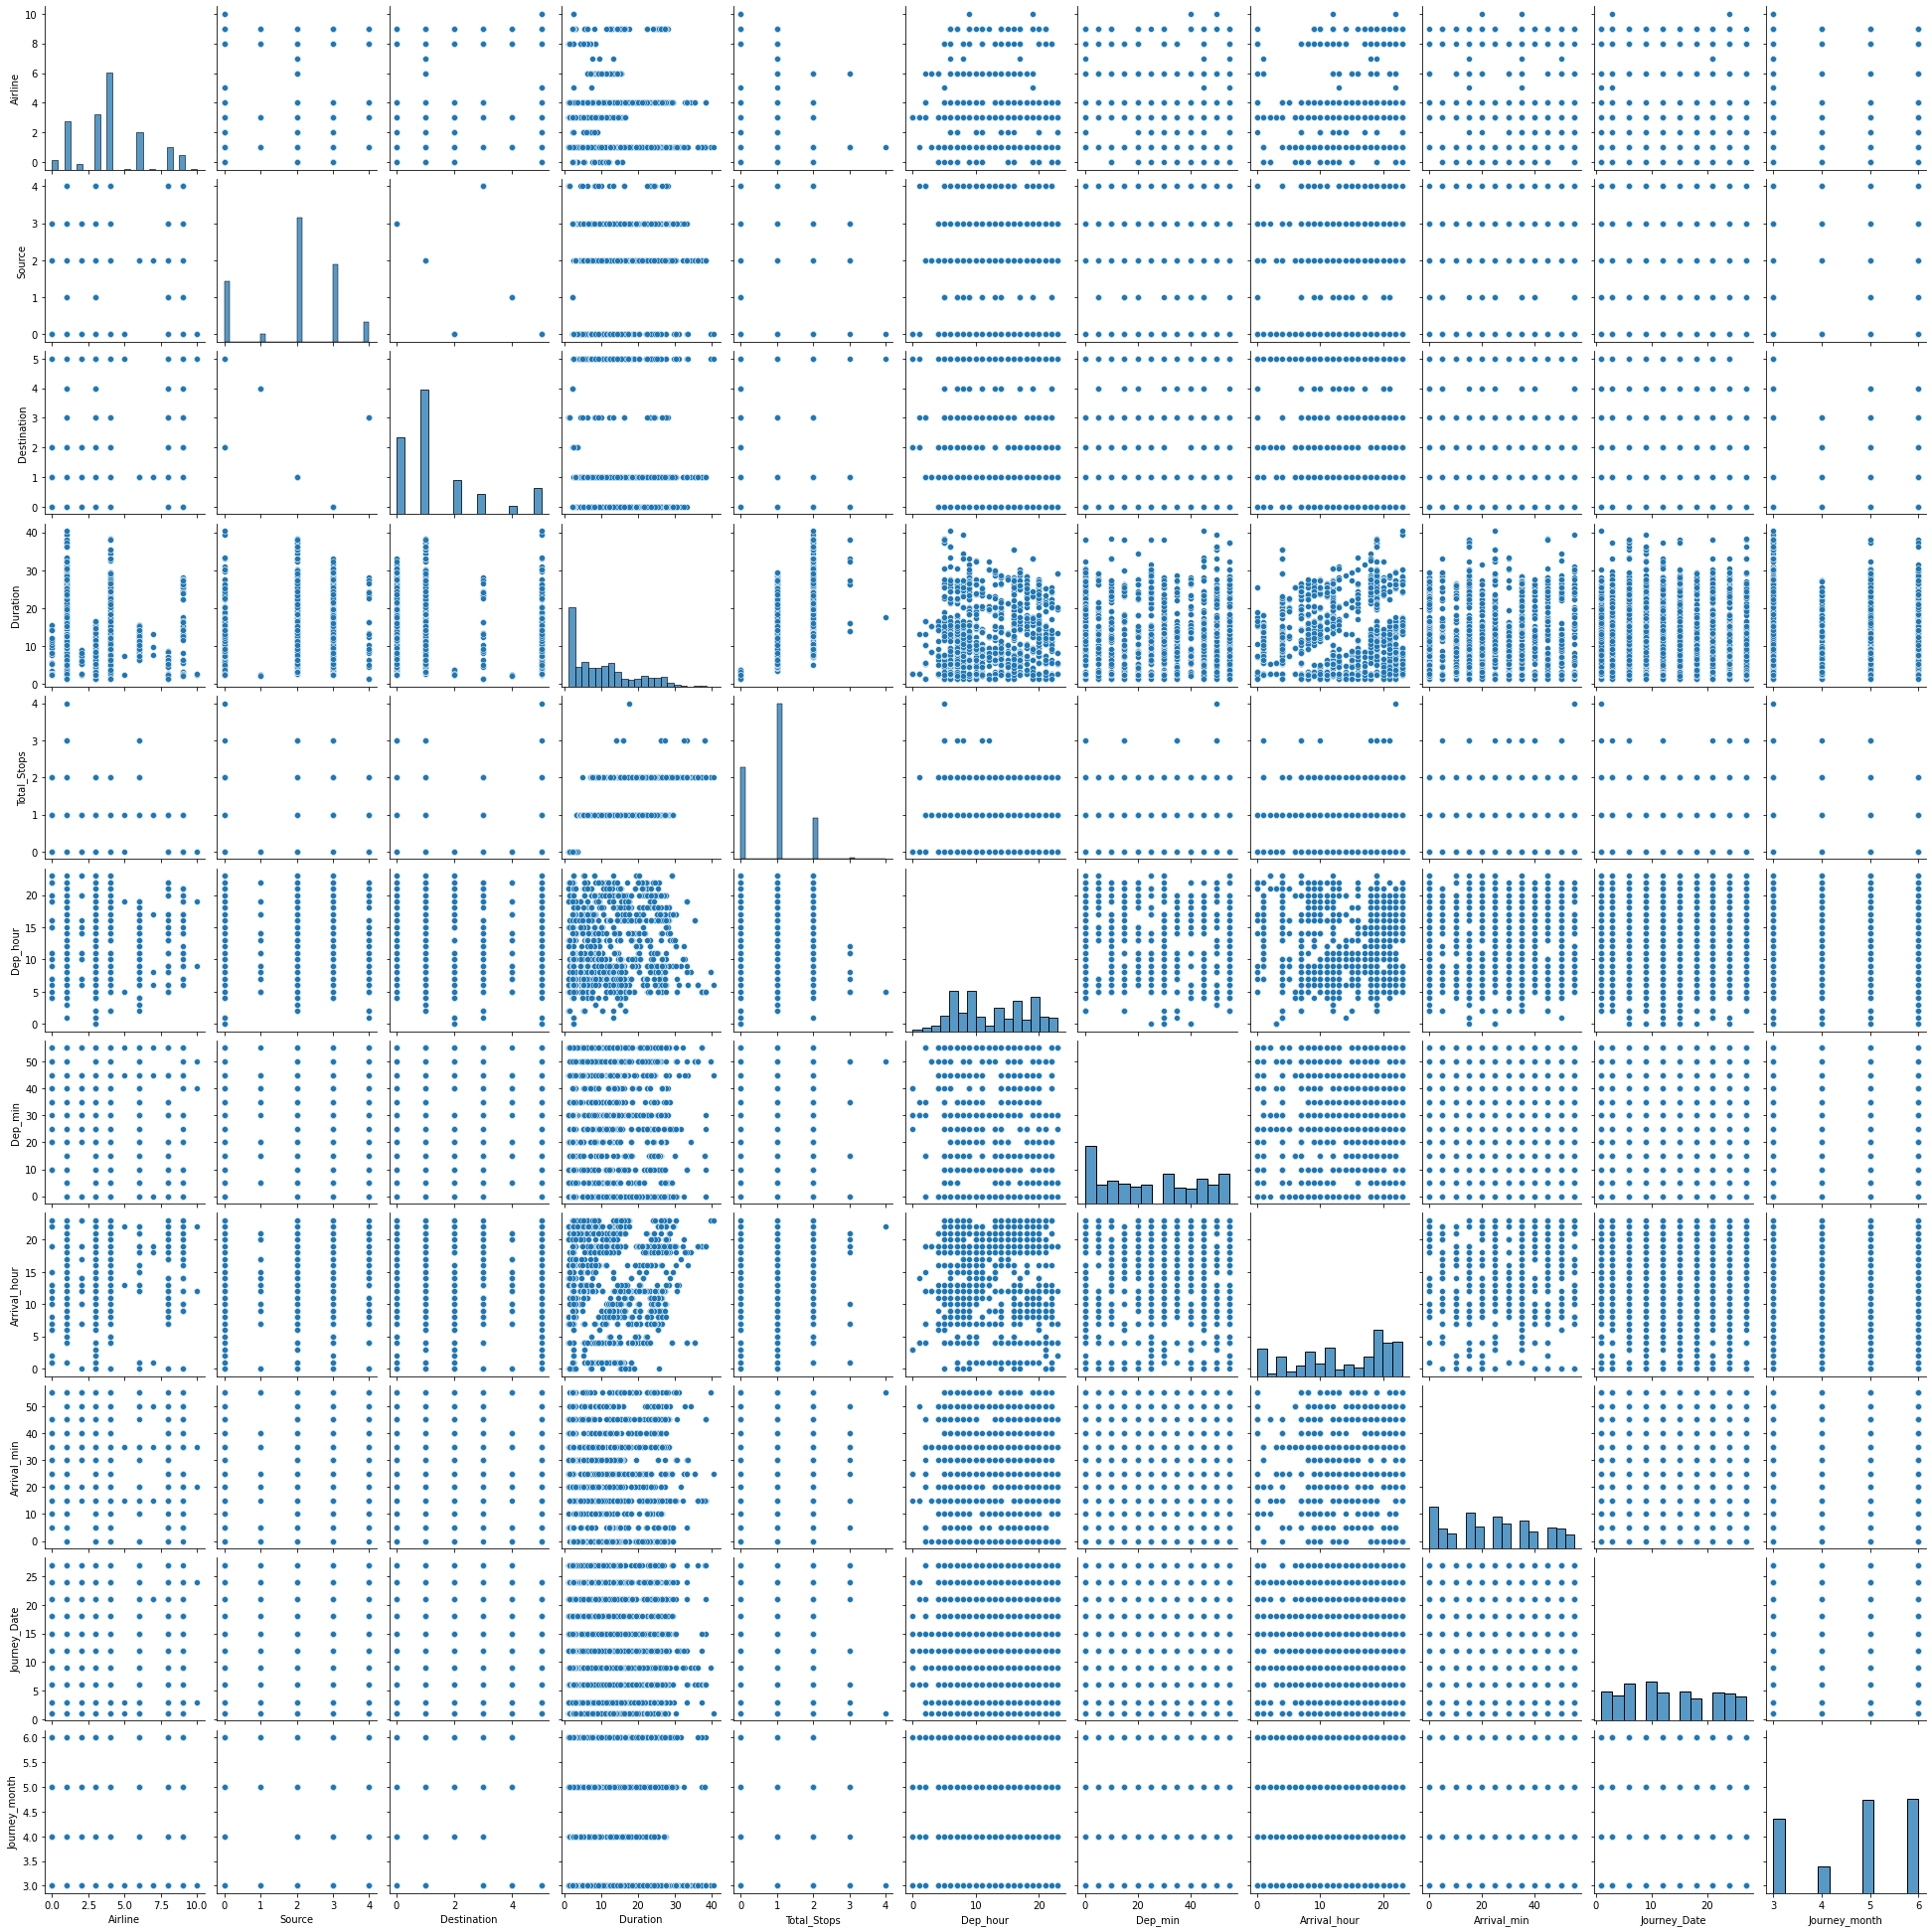

In [91]:
sns.pairplot(df1)

here we can see that all dataset are act in your nature

# Skewness and Outliers removal:

In [92]:
df1.skew()

Airline          0.483882
Source          -0.424997
Destination      1.263630
Duration         0.889523
Total_Stops      0.321364
Dep_hour         0.093759
Dep_min          0.128515
Arrival_hour    -0.443166
Arrival_min      0.115267
Journey_Date     0.199540
Journey_month   -0.403700
dtype: float64

Keeping +/- 0.5 as the range for skewness however all other columns were object type hence we will not consider the skewness.

In [93]:
from scipy.stats import zscore
z=np.abs(zscore(df1))
threshold=3
np.where(z>3)

(array([  72,  251,  251,  484,  510,  673,  725,  786,  875,  877, 1022,
        1271, 1279, 1379, 1511, 1554, 1686, 1689, 1689, 1781, 1918, 1945,
        2021, 2114, 2359, 2422, 2442, 2472, 2487, 2492], dtype=int64),
 array([4, 3, 4, 4, 3, 4, 4, 3, 4, 4, 3, 3, 3, 3, 3, 3, 3, 3, 4, 3, 3, 3,
        4, 3, 3, 4, 4, 3, 4, 3], dtype=int64))

In [94]:
df1_new=df1[(z<3).all(axis=1)]
df1_new

,Airline,Source,Destination,Duration,Total_Stops,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Journey_Date,Journey_month
0,4.0,2.0,1.0,10.55,1.0,17,30,4,25,6,6
1,3.0,3.0,0.0,4.00,1.0,6,20,10,20,12,5
2,4.0,2.0,1.0,23.45,1.0,19,15,19,0,21,5
3,6.0,2.0,1.0,13.00,1.0,8,0,21,0,21,5
4,0.0,0.0,2.0,2.50,0.0,23,55,2,45,24,6
...,...,...,...,...,...,...,...,...,...,...,...
2666,1.0,3.0,0.0,23.55,1.0,20,30,20,25,6,6
2667,3.0,3.0,0.0,2.35,0.0,14,20,16,55,27,3
2668,4.0,2.0,1.0,6.35,1.0,21,50,4,25,6,3
2669,1.0,2.0,1.0,15.15,1.0,4,0,19,15,6,3


now we have no outliers.

In [95]:
df1.shape

(2671, 11)

In [96]:
df1_new.shape

(2643, 11)

In [97]:
#Percentage data loss:
loss_percent=(2671-2643)/2671*100
print(loss_percent)

1.0482965181579933


1.04 percent data loss after removing outliers.

# Lets perform standardization:

In [98]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc.fit_transform(df1_new)

array([[ 1.32187840e-03,  3.15505162e-02, -2.94978023e-01, ...,
         2.82885423e-02, -8.38871378e-01,  1.08946063e+00],
       [-4.35393698e-01,  8.73853692e-01, -9.76470083e-01, ...,
        -2.69586427e-01, -1.11861742e-01,  2.32738094e-01],
       [ 1.32187840e-03,  3.15505162e-02, -2.94978023e-01, ...,
        -1.46108630e+00,  9.78652711e-01,  2.32738094e-01],
       ...,
       [ 1.32187840e-03,  3.15505162e-02, -2.94978023e-01, ...,
         2.82885423e-02, -8.38871378e-01, -1.48070698e+00],
       [-1.30882485e+00,  3.15505162e-02, -2.94978023e-01, ...,
        -5.67461396e-01, -8.38871378e-01, -1.48070698e+00],
       [ 8.74753032e-01,  3.15505162e-02, -2.94978023e-01, ...,
        -5.67461396e-01,  2.51643075e-01,  1.08946063e+00]])

# Load The Model:

In [99]:
import pickle
fitted_model=pickle.load(open("Flight_Price_Prediction.pkl","rb"))

In [100]:
fitted_model

BaggingRegressor(bootstrap='True', bootstrap_features='False', oob_score='True',
                 random_state=3)

In [101]:
prediction=fitted_model.predict(df1_new)

In [104]:
#predicting testing data
prediction

array([11801.84012947,  4226.        , 13759.24460656, ...,
       12779.92389189, 10398.65045662,  8262.05637931])